# 19CSE304 Data Science Final Assignment
### Name : K VIVEK SAI REDDY
### Roll Number : CB.EN.U4CSE20232
### Section: CSE-C

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Q1

-> Data Manipulation-Pandas


In [10]:
bir_rate = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment_4/nchs-birth-rates-for-females-by-age-group-united-states.csv')
bir_rate

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9
...,...,...,...
603,1999,25-29 years,111.2
604,2005,40-44 years,9.1
605,1981,25-29 years,111.5
606,1952,20-24 years,217.6


In [11]:
bir_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        608 non-null    int64  
 1   Age Group   608 non-null    object 
 2   Birth Rate  608 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.4+ KB


In [12]:
bir_rate.describe()

,Year,Birth Rate
count,608.000000,608.000000
mean,1977.500000,60.161678
std,21.955474,59.724269
min,1940.000000,0.200000
25%,1958.750000,3.325000
50%,1977.500000,51.050000
75%,1996.250000,105.500000
max,2015.000000,260.600000


-> Indexing using simple column names and conditions

In [13]:
bir_rate_gt2000 = bir_rate[bir_rate['Year']>=2000]
bir_rate_gt2000.head()

,Year,Age Group,Birth Rate
3,2015,25-29 years,104.3
5,2012,15-19 years,29.4
27,2001,45-49 years,0.5
29,2006,20-24 years,105.5
34,2015,20-24 years,76.8


-> Using loc for indexing

In [14]:
bir_loc = bir_rate.set_index('Year')

In [15]:
bir_loc_data = bir_loc.loc[2000]
bir_loc_data

,Age Group,Birth Rate
Year,,
2000,45-49 years,0.5
2000,40-44 years,8.0
2000,30-34 years,91.2
2000,10-14 years,0.9
2000,20-24 years,109.7
2000,25-29 years,113.5
2000,15-19 years,47.7
2000,35-39 years,39.7


In [16]:
bir_loc_data2 = bir_loc.loc[[2002,2003],['Birth Rate']]
bir_loc_data2

,Birth Rate
Year,
2002,0.5
2002,92.6
2002,0.7
2002,41.6
2002,103.1
2002,42.6
2002,8.3
2002,114.7
2003,0.5


-> Using iloc for indexing

In [18]:
bir_iloc = bir_rate.iloc[5:25,[0,1]]
bir_iloc

,Year,Age Group
5,2012,15-19 years
6,1997,40-44 years
7,1947,15-19 years
8,1992,10-14 years
9,1953,10-14 years
10,1942,25-29 years
11,1987,30-34 years
12,1997,25-29 years
13,1987,15-19 years
14,1971,40-44 years


-> Missing value manipulation

In [19]:
bir_rate.isna().sum()

Year          0
Age Group     0
Birth Rate    0
dtype: int64

In [20]:
bir_rate.isnull().sum()

Year          0
Age Group     0
Birth Rate    0
dtype: int64

In [26]:
bir_rate.fillna(method='ffill')

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9
...,...,...,...
603,1999,25-29 years,111.2
604,2005,40-44 years,9.1
605,1981,25-29 years,111.5
606,1952,20-24 years,217.6


-> Merging, concating, appending and Joining

In [27]:
br1 = bir_rate.iloc[:256,:]
br2 = bir_rate.iloc[256:352,:]
br3 = bir_rate.iloc[352:,:]

In [28]:
br1

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9
...,...,...,...
251,1945,10-14 years,0.8
252,1998,30-34 years,85.2
253,1968,35-39 years,35.4
254,1957,20-24 years,260.6


In [29]:
br2

,Year,Age Group,Birth Rate
256,2001,10-14 years,0.8
257,1985,35-39 years,24.0
258,1985,30-34 years,69.1
259,1966,45-49 years,0.7
260,1991,15-19 years,61.8
...,...,...,...
347,1995,40-44 years,6.6
348,1975,20-24 years,113.0
349,1978,15-19 years,51.5
350,1958,45-49 years,0.9


In [30]:
br3

,Year,Age Group,Birth Rate
352,1983,35-39 years,22.0
353,1945,35-39 years,56.9
354,1971,25-29 years,134.1
355,1965,40-44 years,12.8
356,1961,35-39 years,55.6
...,...,...,...
603,1999,25-29 years,111.2
604,2005,40-44 years,9.1
605,1981,25-29 years,111.5
606,1952,20-24 years,217.6


In [33]:
concat_br = pd.concat([br1,br3,br2])
concat_br.head(260).tail(10)

,Year,Age Group,Birth Rate
250,1940,30-34 years,83.4
251,1945,10-14 years,0.8
252,1998,30-34 years,85.2
253,1968,35-39 years,35.4
254,1957,20-24 years,260.6
255,1974,45-49 years,0.3
352,1983,35-39 years,22.0
353,1945,35-39 years,56.9
354,1971,25-29 years,134.1
355,1965,40-44 years,12.8


-> Appending

In [34]:
par_app = br2.append(br3)
app = par_app.append(br1)

In [36]:
app

,Year,Age Group,Birth Rate
256,2001,10-14 years,0.8
257,1985,35-39 years,24.0
258,1985,30-34 years,69.1
259,1966,45-49 years,0.7
260,1991,15-19 years,61.8
...,...,...,...
251,1945,10-14 years,0.8
252,1998,30-34 years,85.2
253,1968,35-39 years,35.4
254,1957,20-24 years,260.6


-> Merging

In [37]:
brc1 = bir_rate[['Year','Age Group']]
brc2 = bir_rate[['Age Group','Birth Rate']]

In [38]:
brc1.head()

,Year,Age Group
0,1947,25-29 years
1,1997,45-49 years
2,1987,40-44 years
3,2015,25-29 years
4,1945,20-24 years


In [39]:
brc2.head()

,Age Group,Birth Rate
0,25-29 years,176.0
1,45-49 years,0.4
2,40-44 years,4.4
3,25-29 years,104.3
4,20-24 years,138.9


In [41]:
mer_br = pd.merge(brc1,brc2,how = 'left',left_on='Age Group',right_on='Age Group')
mer_br

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1947,25-29 years,104.3
2,1947,25-29 years,142.7
3,1947,25-29 years,108.3
4,1947,25-29 years,161.2
...,...,...,...
46203,1942,45-49 years,0.5
46204,1942,45-49 years,0.4
46205,1942,45-49 years,1.0
46206,1942,45-49 years,0.8


In [42]:
mer_br = mer_br.drop_duplicates()
mer_br

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1947,25-29 years,104.3
2,1947,25-29 years,142.7
3,1947,25-29 years,108.3
4,1947,25-29 years,161.2
...,...,...,...
46168,1942,45-49 years,1.7
46170,1942,45-49 years,0.8
46172,1942,45-49 years,1.9
46173,1942,45-49 years,1.4


-> Joining

In [43]:
brj1 = bir_rate[['Year','Age Group']]
brj2 = bir_rate[['Birth Rate']]

In [44]:
join_br = brj1.join(brj2,lsuffix='1',rsuffix='2',how = 'inner')

In [45]:
join_br.shape

(608, 3)

In [46]:
join_br.head()

,Year,Age Group,Birth Rate
0,1947,25-29 years,176.0
1,1997,45-49 years,0.4
2,1987,40-44 years,4.4
3,2015,25-29 years,104.3
4,1945,20-24 years,138.9


-> Aggregation

In [48]:
bir_rate.aggregate({'Year':['sum','max','min','mean'],
                   'Birth Rate': ['sum','max','min','mean']})

,Year,Birth Rate
sum,1202320.0,36578.300000
max,2015.0,260.600000
min,1940.0,0.200000
mean,1977.5,60.161678


-> Grouping

In [49]:
brg = bir_rate.groupby('Age Group')

In [50]:
brg

In [51]:
avg_by_groups = brg.mean(['Birth Rate'])

In [52]:
avg_by_groups[['Birth Rate']]

,Birth Rate
Age Group,
10-14 years,0.939474
15-19 years,59.597368
20-24 years,146.236842
25-29 years,134.710526
30-34 years,88.350000
35-39 years,40.843421
40-44 years,9.935526
45-49 years,0.680263


-> Transform

In [53]:
trasns_df  = bir_rate[['Year','Birth Rate']]

In [54]:
trasns_df.head()

,Year,Birth Rate
0,1947,176.0
1,1997,0.4
2,1987,4.4
3,2015,104.3
4,1945,138.9


In [55]:
trasns_df.transform(func=['sqrt','exp',lambda x:x/2])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Year               Birth Rate                       
          sqrt  exp <lambda>       sqrt           exp <lambda>
0    44.124823  inf    973.5  13.266499  2.727902e+76    88.00
1    44.687806  inf    998.5   0.632456  1.491825e+00     0.20
2    44.575778  inf    993.5   2.097618  8.145087e+01     2.20
3    44.888751  inf   1007.5  10.212737  1.981137e+45    52.15
4    44.102154  inf    972.5  11.785584  2.106219e+60    69.45
..         ...  ...      ...        ...           ...      ...
603  44.710178  inf    999.5  10.545141  1.965832e+48    55.60
604  44.777226  inf   1002.5   3.016621  8.955293e+03     4.55
605  44.508426  inf    990.5  10.559356  2.653596e+48    55.75
606  44.181444  inf    976.0  14.751271  3.180382e+94   108.80
607  44.068129  inf    971.0   1.264911  4.953032e+00     0.80

[608 rows x 6 columns]

-> Apply

In [56]:
def calc_sum(x):
    return x.sum()
xappdf = trasns_df.apply(calc_sum)

In [57]:
xappdf

Year          1202320.0
Birth Rate      36578.3
dtype: float64

-> Pivot tables

In [58]:
p_table = pd.pivot_table(bir_rate,aggfunc=np.mean,index =['Age Group'],columns=['Year'],values='Birth Rate')

In [59]:
p_table

Year,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Age Group,,,,,,,,,,,,,,,,,,,,,
10-14 years,0.7,0.7,0.7,0.8,0.8,0.8,0.7,0.9,1.0,1.0,...,0.6,0.6,0.6,0.5,0.4,0.4,0.4,0.3,0.3,0.2
15-19 years,54.1,56.9,61.1,61.7,54.3,51.1,59.3,79.3,81.8,83.4,...,41.1,41.5,40.2,37.9,34.2,31.3,29.4,26.5,24.2,22.3
20-24 years,135.6,145.4,165.1,164.0,151.8,138.9,181.8,209.7,200.3,200.1,...,105.5,105.4,101.8,96.2,90.0,85.3,83.1,80.7,79.0,76.8
25-29 years,122.8,128.7,142.7,147.8,136.5,132.2,161.2,176.0,163.4,165.4,...,118.0,118.1,115.0,111.5,108.3,107.2,106.5,105.5,105.8,104.3
30-34 years,83.4,85.3,91.8,99.5,98.1,100.2,108.9,111.9,103.7,102.1,...,98.9,100.6,99.4,97.5,96.5,96.5,97.3,98.0,100.8,101.5
35-39 years,46.3,46.1,47.9,52.8,54.6,56.9,58.7,58.9,54.5,53.5,...,47.5,47.6,46.8,46.1,45.9,47.2,48.3,49.3,51.0,51.8
40-44 years,15.6,15.0,14.7,15.7,16.1,16.6,16.5,16.6,15.7,15.3,...,9.4,9.6,9.9,10.0,10.2,10.3,10.4,10.4,10.6,11.0
45-49 years,1.9,1.7,1.6,1.5,1.4,1.6,1.5,1.4,1.3,1.3,...,0.6,0.6,0.7,0.7,0.7,0.7,0.7,0.8,0.8,0.8


# Q2

 - Time Series

In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Fremont-Bridge-Bicycle-Counter-Data-Analysis/master/Data/Fremont_Bridge_Bicycle_Counter.csv')
data

,Date,Fremont Bridge Total,East,West
0,10/3/2012 0:00,13.0,4.0,9.0
1,10/3/2012 1:00,10.0,4.0,6.0
2,10/3/2012 2:00,2.0,1.0,1.0
3,10/3/2012 3:00,5.0,2.0,3.0
4,10/3/2012 4:00,7.0,6.0,1.0
...,...,...,...,...
62035,10/31/2019 19:00,111.0,44.0,67.0
62036,10/31/2019 20:00,52.0,17.0,35.0
62037,10/31/2019 21:00,41.0,16.0,25.0
62038,10/31/2019 22:00,32.0,14.0,18.0


In [65]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %H:%M')

In [66]:
data.dtypes

Date                    datetime64[ns]
Fremont Bridge Total           float64
East                           float64
West                           float64
dtype: object

-> Index by time

In [67]:
data.set_index("Date", inplace=True)
data.head()

,Fremont Bridge Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [68]:
a = data.loc['2012-10']
print(a)

                     Fremont Bridge Total  East  West
Date                                                 
2012-10-03 00:00:00                  13.0   4.0   9.0
2012-10-03 01:00:00                  10.0   4.0   6.0
2012-10-03 02:00:00                   2.0   1.0   1.0
2012-10-03 03:00:00                   5.0   2.0   3.0
2012-10-03 04:00:00                   7.0   6.0   1.0
...                                   ...   ...   ...
2012-10-31 19:00:00                  88.0  34.0  54.0
2012-10-31 20:00:00                  45.0  14.0  31.0
2012-10-31 21:00:00                  14.0   8.0   6.0
2012-10-31 22:00:00                  14.0   8.0   6.0
2012-10-31 23:00:00                  18.0   5.0  13.0

[696 rows x 3 columns]


In [69]:
a = data[data.index.year == 2012]
print(a)

                     Fremont Bridge Total  East  West
Date                                                 
2012-10-03 00:00:00                  13.0   4.0   9.0
2012-10-03 01:00:00                  10.0   4.0   6.0
2012-10-03 02:00:00                   2.0   1.0   1.0
2012-10-03 03:00:00                   5.0   2.0   3.0
2012-10-03 04:00:00                   7.0   6.0   1.0
...                                   ...   ...   ...
2012-12-31 19:00:00                  28.0  20.0   8.0
2012-12-31 20:00:00                  21.0   6.0  15.0
2012-12-31 21:00:00                   6.0   5.0   1.0
2012-12-31 22:00:00                  11.0   5.0   6.0
2012-12-31 23:00:00                  12.0   7.0   5.0

[2160 rows x 3 columns]


-> Resample, shifting and windowing

In [70]:
daily_totals = data.resample('D', level='Date').sum()
daily_totals

,Fremont Bridge Total,East,West
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2019-10-27,1755.0,794.0,961.0
2019-10-28,4322.0,1479.0,2843.0
2019-10-29,4323.0,1437.0,2886.0


In [71]:
shift_data = data.shift(periods=1, freq='D')
shift_data

,Fremont Bridge Total,East,West
Date,,,
2012-10-04 00:00:00,13.0,4.0,9.0
2012-10-04 01:00:00,10.0,4.0,6.0
2012-10-04 02:00:00,2.0,1.0,1.0
2012-10-04 03:00:00,5.0,2.0,3.0
2012-10-04 04:00:00,7.0,6.0,1.0
...,...,...,...
2019-11-01 19:00:00,111.0,44.0,67.0
2019-11-01 20:00:00,52.0,17.0,35.0
2019-11-01 21:00:00,41.0,16.0,25.0


In [72]:
windowing_mean = data.rolling(7).mean()
windowing_mean

,Fremont Bridge Total,East,West
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
...,...,...,...
2019-10-31 19:00:00,274.285714,67.285714,207.000000
2019-10-31 20:00:00,267.857143,64.285714,203.571429
2019-10-31 21:00:00,256.571429,61.142857,195.428571


-> Time  Shifts

In [73]:
shifted_data = data.shift(periods=1, freq='D')
shifted_data.head()

,Fremont Bridge Total,East,West
Date,,,
2012-10-04 00:00:00,13.0,4.0,9.0
2012-10-04 01:00:00,10.0,4.0,6.0
2012-10-04 02:00:00,2.0,1.0,1.0
2012-10-04 03:00:00,5.0,2.0,3.0
2012-10-04 04:00:00,7.0,6.0,1.0


In [74]:
shifted_data = data.tshift(freq='D')
shifted_data.head()

<ipython-input-74-b15a5619861b>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  shifted_data = data.tshift(freq='D')


,Fremont Bridge Total,East,West
Date,,,
2012-10-04 00:00:00,13.0,4.0,9.0
2012-10-04 01:00:00,10.0,4.0,6.0
2012-10-04 02:00:00,2.0,1.0,1.0
2012-10-04 03:00:00,5.0,2.0,3.0
2012-10-04 04:00:00,7.0,6.0,1.0


-> Visualization

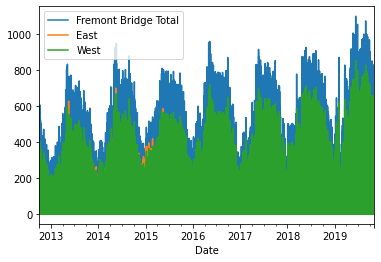

In [75]:
data.plot()

# Q3

In [76]:
data=pd.read_csv('/content/drive/MyDrive/Data Science/Assignment_4/stock_px_2.csv',index_col=0,parse_dates=True)
data.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


- Indexing,Selection,Subsetting

-> indexed based on time

In [79]:
data['AAPL'].loc['2003-01-06']

7.45

In [80]:
data.index.is_unique

True

-> So no need to drop duplicates

In [81]:
#Apple stocks
data.loc[:,['AAPL']]

,AAPL
2003-01-02,7.40
2003-01-03,7.45
2003-01-06,7.45
2003-01-07,7.43
2003-01-08,7.28
...,...
2011-10-10,388.81
2011-10-11,400.29
2011-10-12,402.19
2011-10-13,408.43


In [82]:
#microsoft stock
data.loc[:,['MSFT']]

,MSFT
2003-01-02,21.11
2003-01-03,21.14
2003-01-06,21.52
2003-01-07,21.93
2003-01-08,21.31
...,...
2011-10-10,26.94
2011-10-11,27.00
2011-10-12,26.96
2011-10-13,27.18


In [83]:
#Exxon Corp stock
data.loc[:,['XOM']]

,XOM
2003-01-02,29.22
2003-01-03,29.24
2003-01-06,29.96
2003-01-07,28.95
2003-01-08,28.83
...,...
2011-10-10,76.28
2011-10-11,76.27
2011-10-12,77.16
2011-10-13,76.37


In [84]:
#S&P 500 stock
data.loc[:,['SPX']]

,SPX
2003-01-02,909.03
2003-01-03,908.59
2003-01-06,929.01
2003-01-07,922.93
2003-01-08,909.93
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


In [85]:
data.loc['2011'].count()

AAPL    199
MSFT    199
XOM     199
SPX     199
dtype: int64

In [86]:
data.loc['2011-10'].count()

AAPL    10
MSFT    10
XOM     10
SPX     10
dtype: int64

In [87]:
data['SPX'][data['SPX']>1000]

2003-06-16    1010.74
2003-06-17    1011.66
2003-06-18    1010.09
2003-07-07    1004.42
2003-07-08    1007.84
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 1847, dtype: float64

In [88]:
data['AAPL'][data['AAPL']>10]

2003-07-08     10.20
2003-07-17     10.45
2003-07-18     10.43
2003-07-21     10.31
2003-07-22     10.40
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, Length: 2069, dtype: float64

In [89]:
data1=data.copy()

In [90]:
data1['Sum']=data1['AAPL']+data1['SPX']+data1['MSFT']+data1['XOM']
data1

,AAPL,MSFT,XOM,SPX,Sum
2003-01-02,7.40,21.11,29.22,909.03,966.76
2003-01-03,7.45,21.14,29.24,908.59,966.42
2003-01-06,7.45,21.52,29.96,929.01,987.94
2003-01-07,7.43,21.93,28.95,922.93,981.24
2003-01-08,7.28,21.31,28.83,909.93,967.35
...,...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89,1686.92
2011-10-11,400.29,27.00,76.27,1195.54,1699.10
2011-10-12,402.19,26.96,77.16,1207.25,1713.56
2011-10-13,408.43,27.18,76.37,1203.66,1715.64


Text(0, 0.5, 'Year')

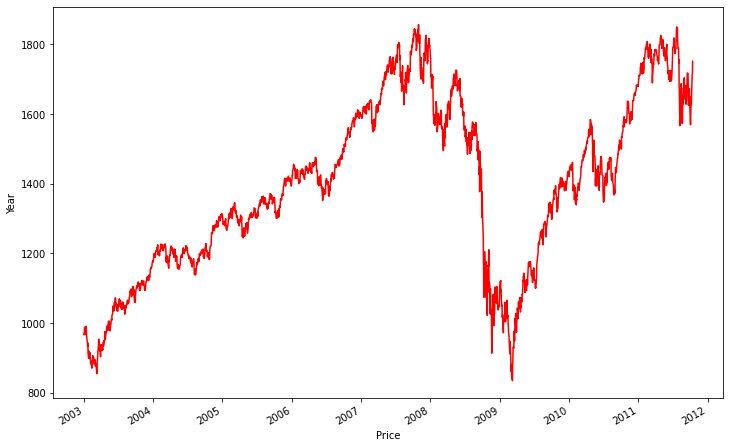

In [91]:
data1.iloc[:,4].plot(figsize=(12,8),color='red')
plt.xlabel('Price')
plt.ylabel('Year')

Text(0, 0.5, 'data price')

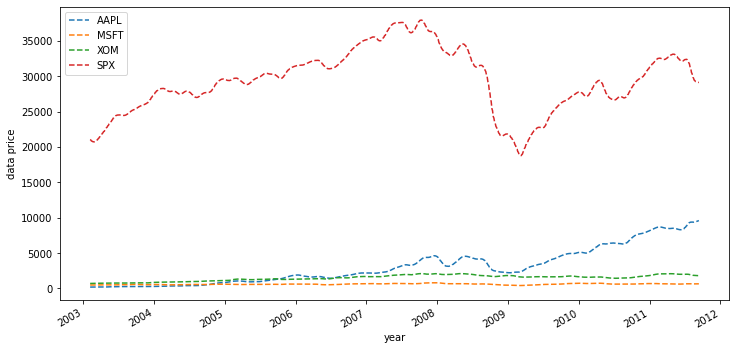

In [92]:
data.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style= '--',figsize=(12,6));
plt.xlabel("year")
plt.ylabel("data price")

->	Date Ranges, Frequencies, and Shifting (Leading and Lagging) Data

In [93]:
from datetime import datetime
current = datetime.now().time() 
print("present =", current)

present = 18:49:59.998228


In [94]:
data2=pd.read_csv('stock_px_2.csv',parse_dates=True)
data2['Unnamed: 0']

FileNotFoundError: ignored

In [ ]:
import datetime
datetime.datetime.combine(datetime.date(2011, 1, 1), datetime.time(10, 23))

In [ ]:
pd.date_range(start='2012-04-01', periods=20)

In [95]:
pd.date_range(end='2012-04-01', periods=20)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

In [96]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [97]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [98]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [99]:
shift1=data.shift(1, axis = 1)
shift1.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,7.40,21.11,29.22
2003-01-03,NaN,7.45,21.14,29.24
2003-01-06,NaN,7.45,21.52,29.96
2003-01-07,NaN,7.43,21.93,28.95
2003-01-08,NaN,7.28,21.31,28.83


In [100]:
shift1=data.shift(1, axis = 0)
shift1.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,7.40,21.11,29.22,909.03
2003-01-06,7.45,21.14,29.24,908.59
2003-01-07,7.45,21.52,29.96,929.01
2003-01-08,7.43,21.93,28.95,922.93


In [101]:
shift1=data.shift(-2, axis = 0)
shift1.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,402.19,26.96,77.16,1207.25
2011-10-11,408.43,27.18,76.37,1203.66
2011-10-12,422.00,27.27,78.11,1224.58
2011-10-13,NaN,NaN,NaN,NaN
2011-10-14,NaN,NaN,NaN,NaN


In [102]:
shift1=data.shift(-2, axis = 1)
shift1.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,76.28,1194.89,NaN,NaN
2011-10-11,76.27,1195.54,NaN,NaN
2011-10-12,77.16,1207.25,NaN,NaN
2011-10-13,76.37,1203.66,NaN,NaN
2011-10-14,78.11,1224.58,NaN,NaN


-> Time Localization and conversion

In [103]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [104]:
df = pytz.timezone('America/New_York')
df

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [105]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [106]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    1.143899
2012-03-10 09:30:00   -0.452523
2012-03-11 09:30:00    0.309643
2012-03-12 09:30:00    1.755607
2012-03-13 09:30:00    1.363281
2012-03-14 09:30:00    0.514584
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    1.143899
2012-03-10 09:30:00+00:00   -0.452523
2012-03-11 09:30:00+00:00    0.309643
2012-03-12 09:30:00+00:00    1.755607
2012-03-13 09:30:00+00:00    1.363281
2012-03-14 09:30:00+00:00    0.514584
Freq: D, dtype: float64

In [108]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [109]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00    1.143899
2012-03-10 09:30:00-05:00   -0.452523
2012-03-11 09:30:00-04:00    0.309643
2012-03-12 09:30:00-04:00    1.755607
2012-03-13 09:30:00-04:00    1.363281
2012-03-14 09:30:00-04:00    0.514584
dtype: float64

In [110]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.143899
2012-03-10 14:30:00+00:00   -0.452523
2012-03-11 13:30:00+00:00    0.309643
2012-03-12 13:30:00+00:00    1.755607
2012-03-13 13:30:00+00:00    1.363281
2012-03-14 13:30:00+00:00    0.514584
dtype: float64

-> Periods and Period Arithmetic and	Period Frequency Conversion

In [111]:
a = pd.Period(2010, freq='A-DEC')
a

Period('2010', 'A-DEC')

In [112]:
a+5

Period('2015', 'A-DEC')

In [113]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [114]:
a.asfreq('M',how='start')

Period('2010-01', 'M')

In [115]:
a = pd.Period('2007', freq='A-JUN')
a

Period('2007', 'A-JUN')

In [116]:
a.asfreq('M', 'start')

Period('2006-07', 'M')

In [117]:
a = pd.Period('2012Q4', freq='Q-JAN')
a

Period('2012Q4', 'Q-JAN')

In [118]:
a.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [119]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [120]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.245260
2000-02-29    1.724642
2000-03-31    0.774799
Freq: M, dtype: float64

In [121]:
pts=ts.to_period()
pts

2000-01   -1.245260
2000-02    1.724642
2000-03    0.774799
Freq: M, dtype: float64

-> Resampling and frequency conversion

In [122]:
mean=data.resample('M').mean()
mean

,AAPL,MSFT,XOM,SPX
2003-01-31,7.239048,20.742381,28.356190,895.836190
2003-02-28,7.333684,18.786316,27.985263,837.618947
2003-03-31,7.299048,19.395238,29.065238,846.621429
2003-04-30,6.923810,19.871429,29.050476,890.025714
2003-05-31,8.885238,19.946667,29.728571,935.962857
...,...,...,...,...
2011-06-30,331.081364,24.299091,79.365909,1287.288636
2011-07-31,372.238000,26.799000,82.196500,1325.184500
2011-08-31,376.762609,25.317826,73.058696,1185.305652
2011-09-30,392.493333,25.969048,72.399524,1173.879048


Text(0, 0.5, 'monthly mean of stock price')

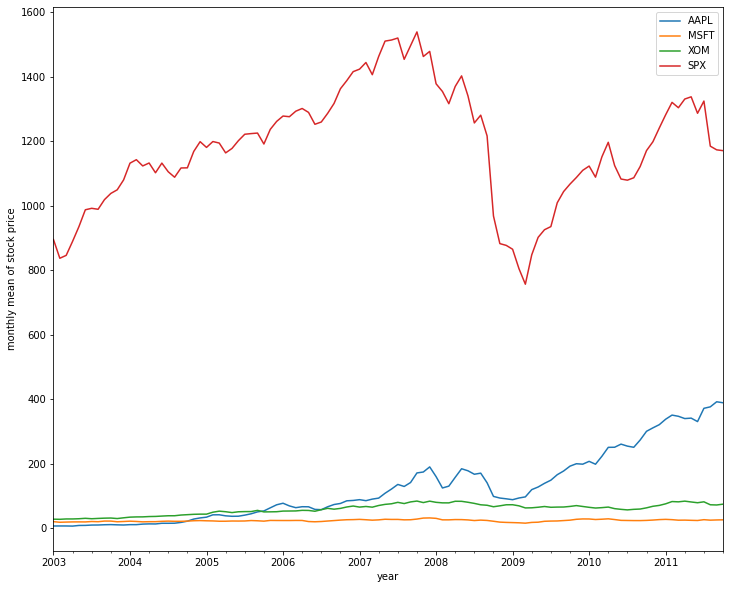

In [123]:
mean.plot(style='-',figsize=(12,10))
plt.xlabel("year")
plt.ylabel("monthly mean of stock price")

In [124]:
sum_month=data.resample('M').sum()
sum_month

,AAPL,MSFT,XOM,SPX
2003-01-31,152.02,435.59,595.48,18812.56
2003-02-28,139.34,356.94,531.72,15914.76
2003-03-31,153.28,407.30,610.37,17779.05
2003-04-30,145.40,417.30,610.06,18690.54
2003-05-31,186.59,418.88,624.30,19655.22
...,...,...,...,...
2011-06-30,7283.79,534.58,1746.05,28320.35
2011-07-31,7444.76,535.98,1643.93,26503.69
2011-08-31,8665.54,582.31,1680.35,27262.03
2011-09-30,8242.36,545.35,1520.39,24651.46


Text(0, 0.5, 'monthly sum of stock price')

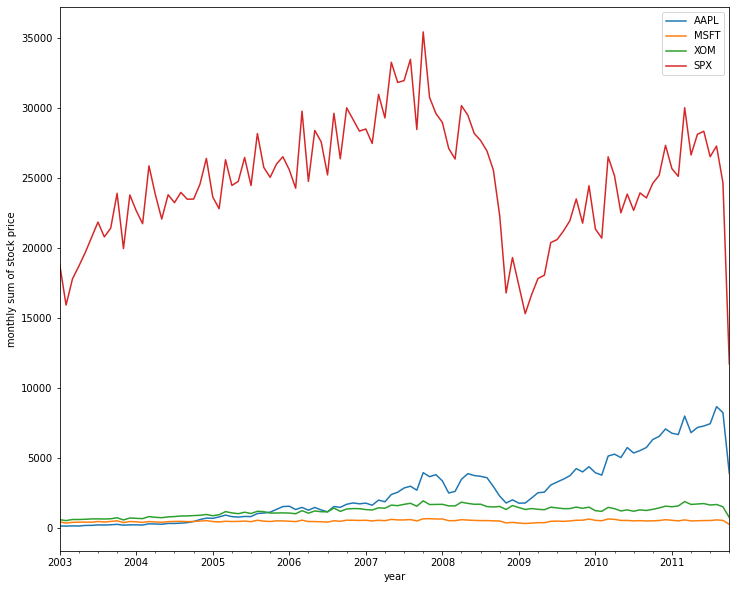

In [125]:
sum_month.plot(style='-',figsize=(12,10))
plt.xlabel("year")
plt.ylabel("monthly sum of stock price")

In [126]:
std_month=data.resample('M').std()
std_month

,AAPL,MSFT,XOM,SPX
2003-01-31,0.173577,1.203287,0.982005,30.056188
2003-02-28,0.145190,0.400738,0.355549,10.717981
2003-03-31,0.133862,0.974862,0.529524,27.253559
2003-04-30,0.258001,0.409100,0.314269,18.846719
2003-05-31,0.634591,0.634896,0.414551,12.824100
...,...,...,...,...
2011-06-30,7.810975,0.652752,1.243006,16.078314
2011-07-31,19.197723,0.592167,1.336800,17.310910
2011-08-31,11.792712,0.896731,2.595504,44.669536
2011-09-30,12.294938,0.679838,1.444176,25.762277


Text(0, 0.5, 'monthly std of stock price')

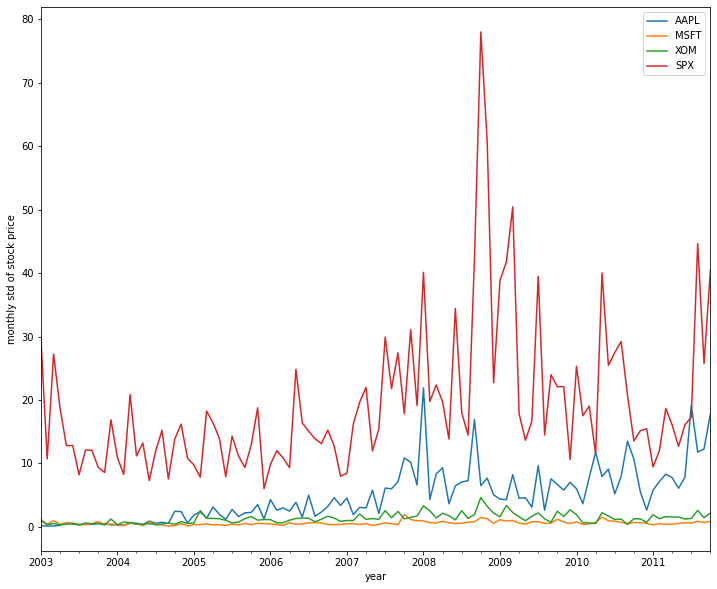

In [127]:
std_month.plot(style='-',figsize=(12,10))

plt.xlabel("year")
plt.ylabel("monthly std of stock price")

-> Downsampling


- Aggregating 1 week full of days into a single data

In [128]:
sample=data.resample('W',closed='right').sum()
sample

,AAPL,MSFT,XOM,SPX
2003-01-05,14.85,42.25,58.46,1817.62
2003-01-12,36.86,108.66,146.21,4617.01
2003-01-19,36.20,108.63,144.35,4592.52
2003-01-26,27.94,80.34,109.97,3514.72
2003-02-02,36.17,95.71,136.49,4270.69
...,...,...,...,...
2011-09-18,1947.32,132.54,364.69,5948.94
2011-09-25,2043.34,130.30,358.23,5838.93
2011-10-02,1971.33,127.03,363.21,5781.21
2011-10-09,1872.52,128.35,365.38,5687.64


Text(0, 0.5, 'downsampled price of stock(data)')

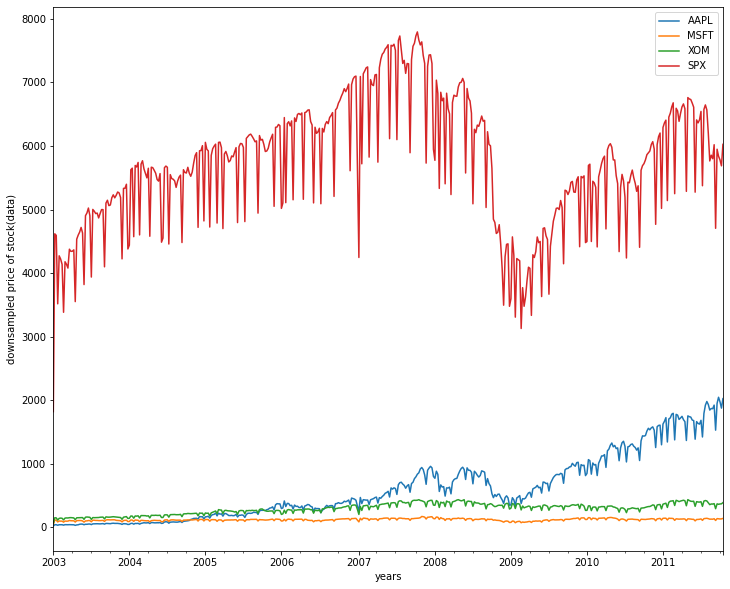

In [129]:
sample.plot(style='-',figsize=(12,10))

plt.xlabel("years")
plt.ylabel("downsampled price of stock(data)")

- increasing the number of data

In [130]:
upsample=data.resample('H')
upsample

In [131]:
data.resample('H').ffill()

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-02 01:00:00,7.40,21.11,29.22,909.03
2003-01-02 02:00:00,7.40,21.11,29.22,909.03
2003-01-02 03:00:00,7.40,21.11,29.22,909.03
2003-01-02 04:00:00,7.40,21.11,29.22,909.03
...,...,...,...,...
2011-10-13 20:00:00,408.43,27.18,76.37,1203.66
2011-10-13 21:00:00,408.43,27.18,76.37,1203.66
2011-10-13 22:00:00,408.43,27.18,76.37,1203.66
2011-10-13 23:00:00,408.43,27.18,76.37,1203.66


Text(0, 0.5, 'Price of the stockes')

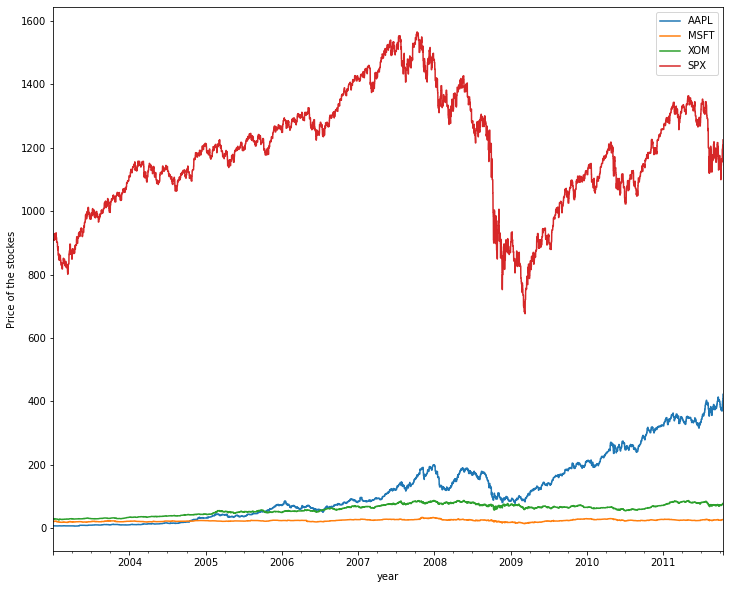

In [132]:
a=data.resample('H').ffill()
a.plot(style='-',figsize=(12,10))

plt.xlabel("year")
plt.ylabel("Price of the stockes")

-> Moving Window Function

In [133]:
stock1=data[['AAPL','MSFT','XOM']]
stock1=stock1.resample('B').ffill()

Text(0, 0.5, 'Apple stock price')

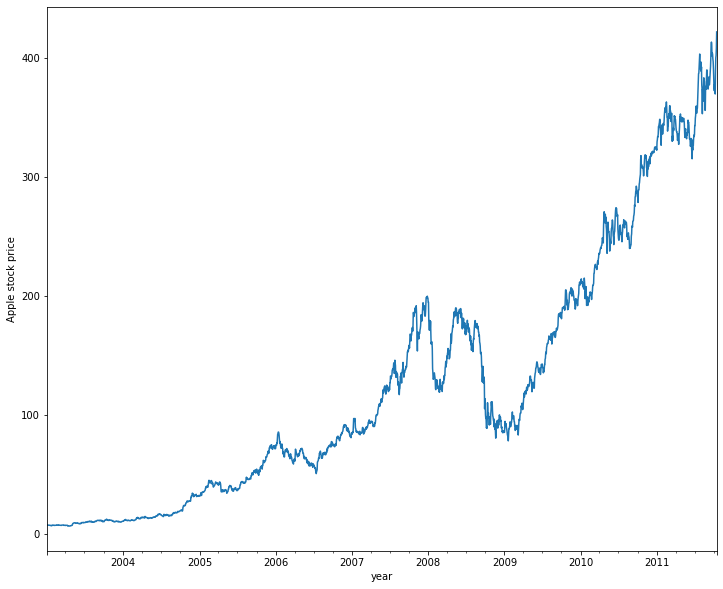

In [134]:
stock1.AAPL.plot(figsize=(12,10))
plt.xlabel("year")
plt.ylabel("Apple stock price")

Text(0, 0.5, 'Apple mean')

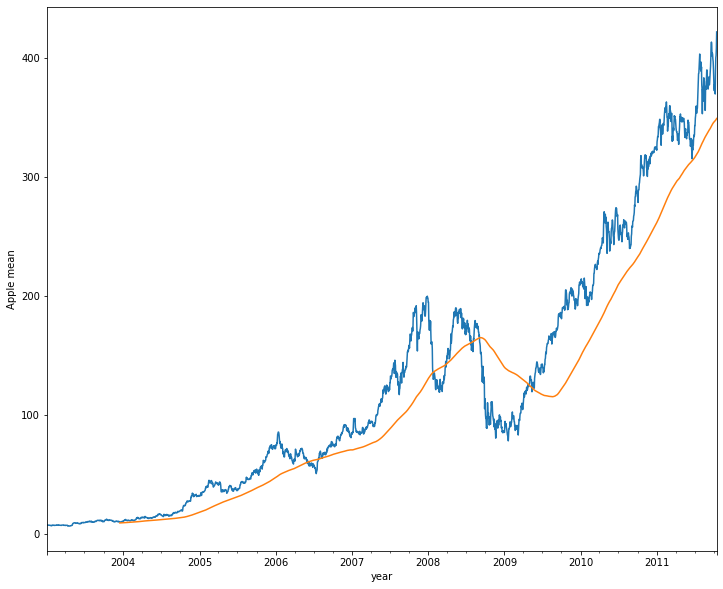

In [135]:
stock1.AAPL.plot(figsize=(12,10))
stock1.AAPL.rolling(250).mean().plot()

plt.xlabel("year")
plt.ylabel("Apple mean")

Text(0, 0.5, 'Apple std')

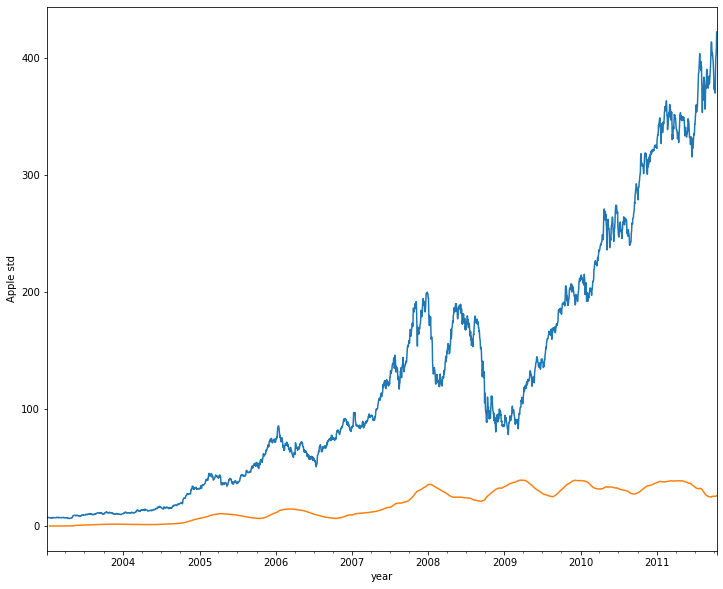

In [136]:
stock1.AAPL.plot(figsize=(12,10))
one=stock1.AAPL.rolling(250,min_periods=10).std()
one.plot(figsize=(12,10))

plt.xlabel("year")
plt.ylabel("Apple std")

Text(0, 0.5, 'year')

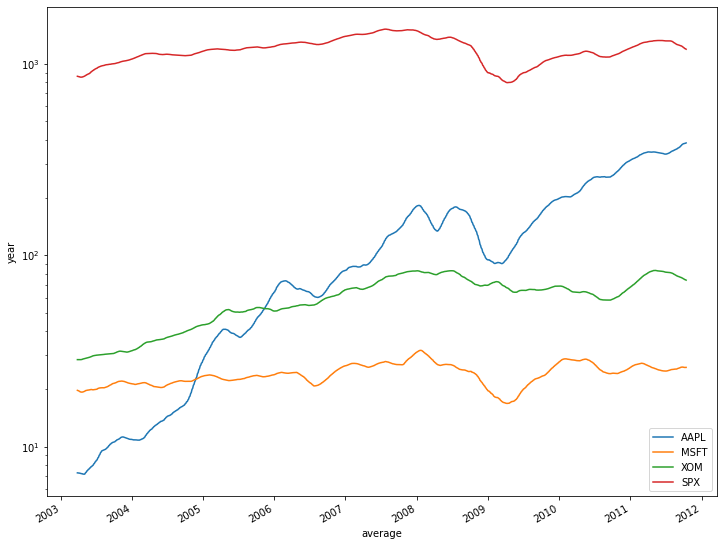

In [137]:
data.rolling(60).mean().plot(logy=True,figsize=(12,10))

plt.xlabel("average")
plt.ylabel("year")

# Q4

In [139]:
df=pd.read_csv("/content/drive/MyDrive/Data Science/Assignment_4/kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [141]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [142]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [143]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [144]:
df= df[['hemo','bgr','classification']]

In [145]:
dfcorr =df.corr()

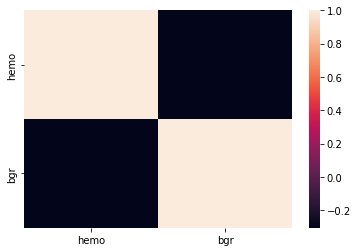

In [146]:
sns.heatmap(dfcorr)

In [149]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [150]:
df

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


In [151]:
df.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [152]:
df.fillna(method='bfill',inplace=True)
df.isna().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


hemo              0
bgr               0
classification    0
dtype: int64

In [153]:
df.shape

(400, 3)

In [154]:
df.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


In [155]:
classification = np.array(df['classification'])

In [156]:
for i in range(len(classification)):
    if classification[i]=='ckd\t':
        classification[i]='ckd'

In [157]:
df['classification']=classification

<ipython-input-157-d64bd4b59574>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification']=classification


In [158]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [159]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [160]:
lab = LabelEncoder()
mms = MinMaxScaler()

In [161]:
df['classification']=lab.fit_transform(df['classification'])

<ipython-input-161-8e2842327ea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification']=lab.fit_transform(df['classification'])


In [162]:
df.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,12.388500,147.585000,0.375000
std,2.865265,79.444928,0.484729
min,3.100000,22.000000,0.000000
25%,10.400000,99.000000,0.000000
50%,12.500000,120.000000,0.000000
75%,14.800000,163.500000,1.000000
max,17.800000,490.000000,1.000000


In [163]:
cols = df.columns
cols

Index(['hemo', 'bgr', 'classification'], dtype='object')

In [164]:
for i in cols:
    df[i]=mms.fit_transform(df[[i]])

<ipython-input-164-e67246c6711f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=mms.fit_transform(df[[i]])
<ipython-input-164-e67246c6711f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=mms.fit_transform(df[[i]])
<ipython-input-164-e67246c6711f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [165]:
df.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,0.631871,0.268344,0.375000
std,0.194916,0.169754,0.484729
min,0.000000,0.000000,0.000000
25%,0.496599,0.164530,0.000000
50%,0.639456,0.209402,0.000000
75%,0.795918,0.302350,1.000000
max,1.000000,1.000000,1.000000


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
y = df.pop('classification')

In [168]:
X = df

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC()

In [171]:
knn.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=7)

In [172]:
dtc.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [173]:
svc.fit(X=X_train,y=y_train)

SVC()

In [174]:
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
svc_ypred = svc.predict(X_test)

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score,confusion_matrix
knn_acc = accuracy_score(y_test,knn_ypred)
print(f'Accuracy score : {knn_acc}')

Accuracy score : 0.9625


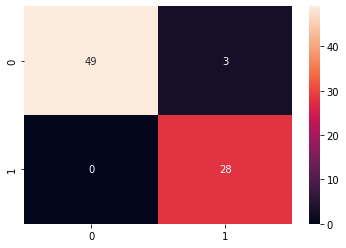

In [179]:
knn_conf = confusion_matrix(y_test,knn_ypred)
sns.heatmap(knn_conf,cbar=True,annot=True)

In [180]:
print('The confusion matrix is :')
knn_conf

The confusion matrix is :


array([[49,  3],
       [ 0, 28]])

In [181]:
print('The confusion matrix is :')
knn_conf

The confusion matrix is :


array([[49,  3],
       [ 0, 28]])

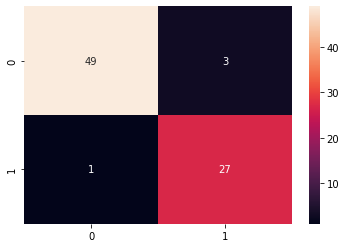

In [182]:
dtc_conf = confusion_matrix(y_test,dtc_ypred)
sns.heatmap(dtc_conf,cbar=True,annot=True)

In [183]:
print('The confusion matrix is :')
dtc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]])

In [184]:
svc_acc = accuracy_score(y_test,svc_ypred)
print(f'Accuracy score : {svc_acc}')

Accuracy score : 0.95


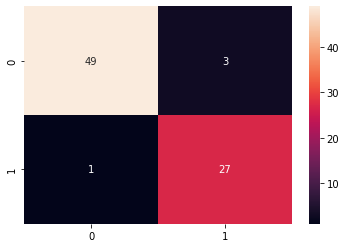

In [185]:
svc_conf = confusion_matrix(y_test,svc_ypred)
sns.heatmap(svc_conf,cbar=True,annot=True)

In [186]:
print('The confusion matrix is :')
svc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]])

-> Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD

- Given that Alice has heamoglobin 0 std's above average and 1.1 std's above average
so heamoglobin is (0*std)+(mean(heamoglobin)
and glucose is (1.1*std)+mean(glucose)

In [187]:
hem = np.array(df['hemo'])
glu = np.array(df['bgr'])

In [188]:
s_h = np.std(hem)
g_h = np.std(glu)
s_m = np.mean(hem)
g_m = np.mean(glu)

In [189]:
ali_h = (0*s_h)+s_m
ali_g = (1.1*g_h)+g_m
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,0.631871,0.45484


In [190]:
#knn
ali_knn = knn.predict(alice)
ali_dtc = dtc.predict(alice)
ali_svc = svc.predict(alice)

In [191]:
print(f'Prediction of disease in KNN : {ali_knn}')
print(f'Prediction of disease in KNN : {ali_dtc}')
print(f'Prediction of disease in KNN : {ali_svc}')

Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]


From the above predictions it is clear that Alice doesnot have tha disease beacuse all the predictions are 0.
- So alice doesnot have the disease

## Q6

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [207]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/Assignment_4/Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [208]:
df.shape

(569, 6)

In [209]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [210]:
X=df.drop(columns='diagnosis',axis=1)
Y=df['diagnosis']

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [212]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [213]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [214]:
y_predicted = model.predict(X_test)

In [215]:
y_predicted

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0])

In [216]:
y_test_predict=model.predict(X_test)
print("Accuracy Score on Testing Dataset :{}".format(accuracy_score(y_test,y_test_predict)))

Accuracy Score on Testing Dataset :0.8947368421052632


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.88      0.86        43
           1       0.93      0.90      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



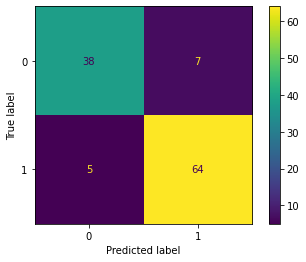

In [217]:
# Plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_test),y_test))

# Q7

In [219]:
home= pd.read_csv('/content/drive/MyDrive/Data Science/Assignment_4/House.csv')
home

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [220]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [221]:
home.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [222]:
obj_colums = home.describe(include='object').columns

In [223]:
home.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [224]:
obj_colums

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [226]:
from sklearn.preprocessing import LabelEncoder
for i in home.columns:
    home[i]=LabelEncoder().fit_transform(home[[i]])
home.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,95.728440,135.471560,1.965138,0.286239,0.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,56.256108,76.059693,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,71.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87.000000,130.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,137.000000,196.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,218.000000,283.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [227]:
all_cols = home.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [228]:
home.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,95.728440,135.471560,1.965138,0.286239,0.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,56.256108,76.059693,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,71.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87.000000,130.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,137.000000,196.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,218.000000,283.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [229]:
#now the data is ready for traing
yh= home.pop('price')
Xh = home

In [230]:
from sklearn.model_selection import train_test_split
Xh_train,Xh_test,yh_train,yh_test = train_test_split(Xh,yh,test_size=0.2,random_state=42)

In [231]:
Xh_train.shape

(436, 12)

In [232]:
Xh_test.shape

(109, 12)

In [233]:
yh_train.shape

(436,)

In [234]:
yh_test.shape

(109,)

In [235]:
#let us import knn and multiple regressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
regressor = LinearRegression()
knr = KNeighborsRegressor()

In [236]:
#first linear regressor
regressor.fit(Xh_train,yh_train)
home_pred = regressor.predict(Xh_test)

In [239]:
#now KNN regressor
knr.fit(Xh_train,yh_train)
khome_pred = knr.predict(Xh_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


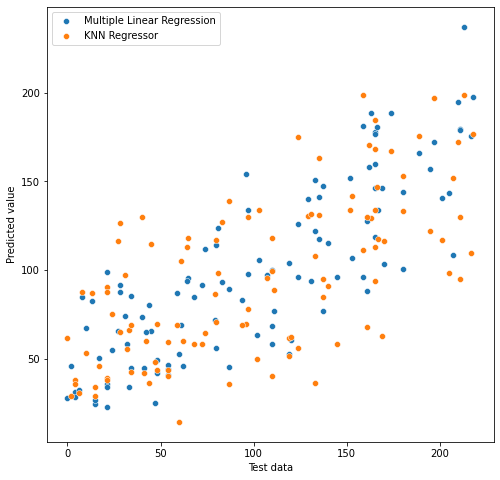

In [240]:
#plotting the results in a plot to see the relation
plt.figure(figsize=(8,8))
sns.scatterplot(yh_test,home_pred)
sns.scatterplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


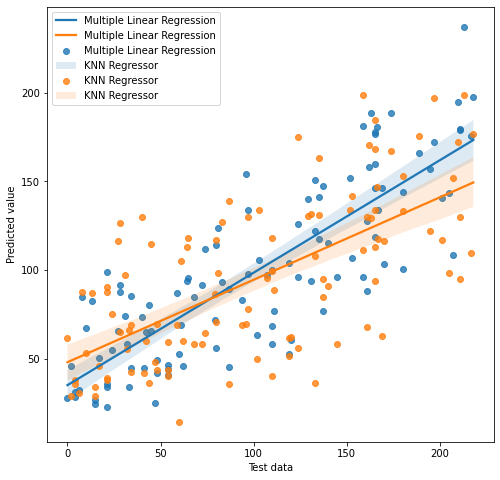

In [241]:
plt.figure(figsize=(8,8))
sns.regplot(yh_test,home_pred)
sns.regplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


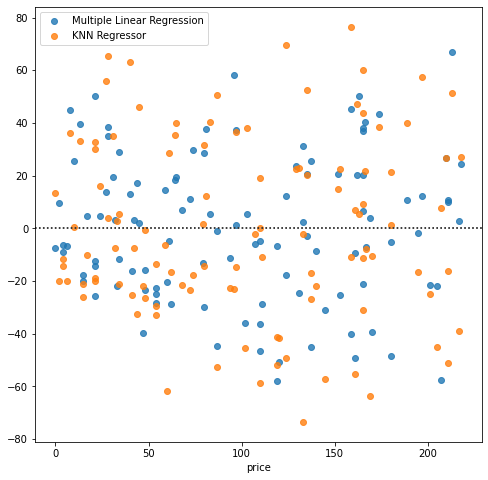

In [242]:
plt.figure(figsize=(8,8))

sns.residplot(yh_test,home_pred,label='Multiple Linear Regression')

sns.residplot(yh_test,khome_pred,label='KNN Regressor')
plt.legend()

In [243]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [244]:
#mlr
rmae = mean_absolute_error(yh_test,home_pred)
rmse = mean_squared_error(yh_test,home_pred)
rr2 = r2_score(yh_test,home_pred)

In [245]:
#knnr
kmae = mean_absolute_error(yh_test,khome_pred)
kmse = mean_squared_error(yh_test,khome_pred)
kr2 = r2_score(yh_test,khome_pred)

In [246]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

,MAE,MSE,R2 score
Multiple Linear Regression,29.228272,1304.408525,0.679294
KNN Regressor,38.963303,2351.149725,0.421938


-> Comments : 

- We can observe that MAE is better for KNN regressor but MSE and R2 score are better for Multiple Regression.

-> So in this case Multiple Regression is better

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [249]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/Assignment_4/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [250]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
df.shape

(891, 12)

In [252]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
df=df.drop(columns=['PassengerId','Ticket','Name','Cabin'],axis=1)

In [254]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [255]:
mean_val=df['Age'].mean()
df['Age'].fillna(value=mean_val,inplace=True)

In [256]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [257]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

-> Encode the classes with 0,1 values accordingly

In [258]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [259]:
X=df.drop(columns='Survived',axis=1)
Y=df['Survived']

In [261]:
#Importing Logistic regression from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [262]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [263]:
# Making predictions through the trained model
y_predicted = model.predict(X_test)

In [264]:
y_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [265]:
y_test_predict=model.predict(X_test)
print("Accuracy Score on Testing Dataset :{}".format(accuracy_score(y_test,y_test_predict)))

Accuracy Score on Testing Dataset :0.7821229050279329


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.75      0.82       121
           1       0.62      0.84      0.72        58

    accuracy                           0.78       179
   macro avg       0.77      0.80      0.77       179
weighted avg       0.82      0.78      0.79       179



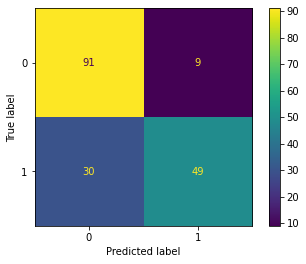

In [266]:
# Plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_test),y_test))